In [ ]:
#use o aprendizado de máquina para criar um modelo que preveja quais passageiros sobreviveram ao naufrágio do Titanic.

#1 - para sobreviveu

#0 - para falecido

In [ ]:
import pandas as pd
import numpy as np

base_teste = pd.read_csv(r'C:\Users\Mauro Jorge Ernesto\OneDrive\Documentos\Mauro\Python\kaggle\Titanic - Aprendizado de máquina com o desastre\test.csv', sep=',')

base_treino = pd.read_csv(r'C:\Users\Mauro Jorge Ernesto\OneDrive\Documentos\Mauro\Python\kaggle\Titanic - Aprendizado de máquina com o desastre\train.csv', sep=',')

print(base_teste.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


In [ ]:
print(base_treino.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
# Verificar valores ausentes
print(base_treino.isnull().sum())
print(base_teste.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
# Preencher valores ausentes na idade com a mediana
base_treino['Age'] = base_treino['Age'].fillna(base_treino['Age'].median())
base_teste['Age'] = base_teste['Age'].fillna(base_teste['Age'].median())

# Preencher valores ausentes no Embarked com o valor mais comum
base_treino['Embarked'] = base_treino['Embarked'].fillna(base_treino['Embarked'].mode()[0])

# Preencher valores ausentes no Fare do conjunto de teste
base_teste['Fare'] = base_teste['Fare'].fillna(base_teste['Fare'].median())

# Como a variável Cabin tem muitos valores ausentes, podemos descartá-la
#base_treino.drop('Cabin', axis=1, inplace=True)
#base_teste.drop('Cabin', axis=1, inplace=True)


In [ ]:
print(base_treino.describe())
print(base_teste.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
co

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

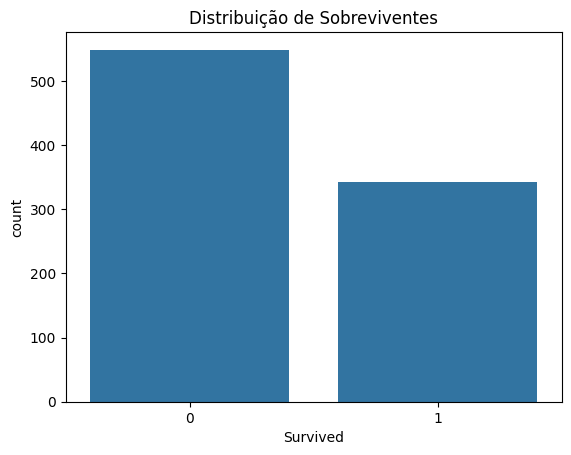

In [ ]:
#Analisar a Distribuição das Variáveis Alvo

sns.countplot(x='Survived', data=base_treino)
plt.title('Distribuição de Sobreviventes')
plt.show()


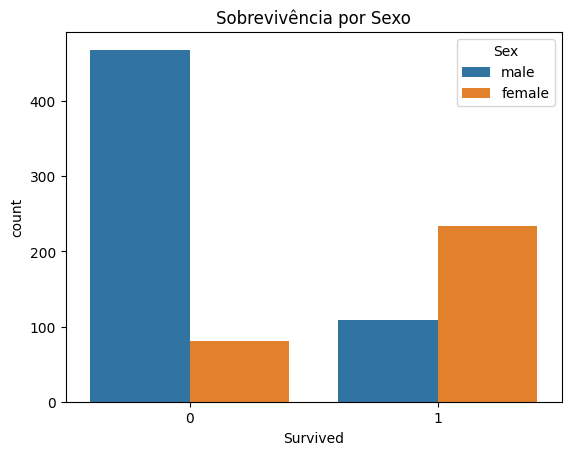

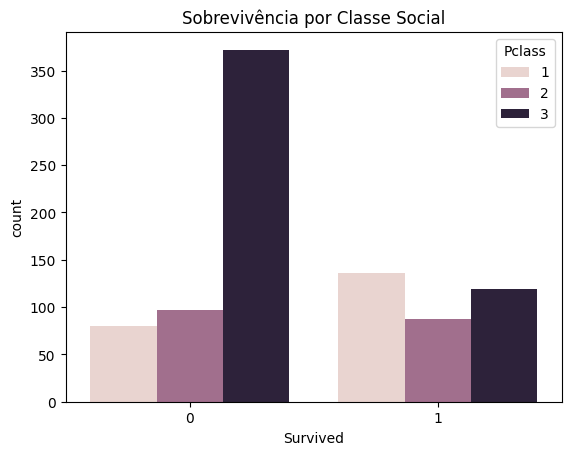

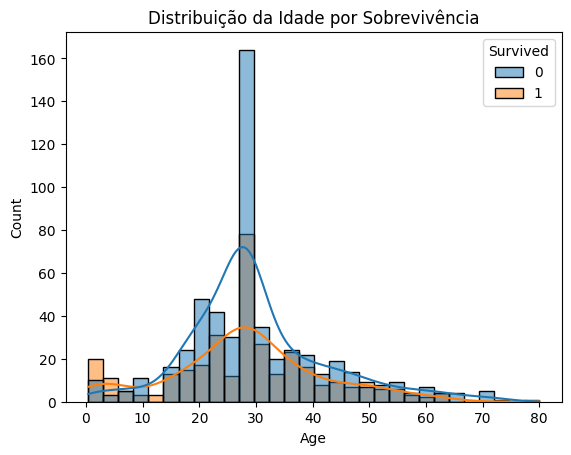

In [ ]:
# Sobrevivência por Sexo
sns.countplot(x='Survived', hue='Sex', data=base_treino)
plt.title('Sobrevivência por Sexo')
plt.show()

# Sobrevivência por Classe
sns.countplot(x='Survived', hue='Pclass', data=base_treino)
plt.title('Sobrevivência por Classe Social')
plt.show()

# Sobrevivência por Idade
sns.histplot(data=base_treino, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Distribuição da Idade por Sobrevivência')
plt.show()


In [ ]:
# Variáveis categóricas: Sex, Embarked
# Usando Label Encoding para 'Sex' e One-Hot Encoding para 'Embarked'

# Label Encoding para 'Sex'
base_treino['Sex'] = base_treino['Sex'].map({'male': 0, 'female': 1})
base_teste['Sex'] = base_teste['Sex'].map({'male': 0, 'female': 1})

# One-Hot Encoding para 'Embarked'
base_treino = pd.get_dummies(base_treino, columns=['Embarked'], drop_first=True)
base_teste = pd.get_dummies(base_teste, columns=['Embarked'], drop_first=True)


In [ ]:
#Família: Número total de familiares a bordo.

base_treino['FamilySize'] = base_treino['SibSp'] + base_treino['Parch'] + 1
base_teste['FamilySize'] = base_teste['SibSp'] + base_teste['Parch'] + 1

# Remover as colunas 'SibSp' e 'Parch' se desejar

base_treino.drop(['SibSp', 'Parch'], axis=1, inplace=True)
base_teste.drop(['SibSp', 'Parch'], axis=1, inplace=True)


In [ ]:
#Separar Recursos e Alvo

X = base_treino.drop(['PassengerId', 'Survived', 'Ticket'], axis=1)
y = base_treino['Survived']

X_test = base_teste.drop(['PassengerId', 'Ticket'], axis=1)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Para avaliar o desempenho do modelo, separe uma parte dos dados para validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Criar nova coluna indicando se o passageiro tem cabine
X_train['Has_Cabin'] = X_train['Cabin'].notnull().astype(int)

X_train.drop(columns=['Cabin'], inplace=True)

print(X_train.dtypes)


Pclass          int64
Sex             int64
Age           float64
Fare          float64
Embarked_Q       bool
Embarked_S       bool
FamilySize      int64
Has_Cabin       int64
dtype: object


In [ ]:
# Criar a coluna 'Has_Cabin' em ambos os conjuntos
X_val['Has_Cabin'] = X_val['Cabin'].notnull().astype(int)

# Garantir que X_val tenha as mesmas colunas e na mesma ordem que X_train
X_val = X_val[X_train.columns]

# Treinar o modelo
RL = LogisticRegression(max_iter=1000)
RL.fit(X_train, y_train)

# Fazer previsões
y_pred = RL.predict(X_val)

# Avaliar o modelo
from sklearn.metrics import accuracy_score
print("Acurácia:", accuracy_score(y_val, y_pred))


Acurácia: 0.8212290502793296


In [ ]:
#Melhore o desempenho do modelo selecionado ajustando seus hiperparâmetros usando técnicas como Grid Search ou Random Search.

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("Melhores Parâmetros:", rf_grid.best_params_)
print("Melhor Acurácia:", rf_grid.best_score_)


Melhores Parâmetros: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Melhor Acurácia: 0.8314389835516597


In [ ]:
# Verificar e criar a coluna 'Has_Cabin' em X_test
if 'Has_Cabin' not in X_test.columns:
    X_test['Has_Cabin'] = 0  # Preencher com 0, assumindo que não há dados de cabine

# Garantir que X_test tem exatamente as mesmas colunas e ordem que X_train
X_test = X_test[X_train.columns]


In [ ]:
print("Colunas de X_train:", X_train.columns)
print("Colunas de X_test:", X_test.columns)


Colunas de X_train: Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_Q', 'Embarked_S',
       'FamilySize', 'Has_Cabin'],
      dtype='object')
Colunas de X_test: Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_Q', 'Embarked_S',
       'FamilySize', 'Has_Cabin'],
      dtype='object')


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Configurar o GridSearchCV
rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # Número de folds na validação cruzada
    scoring='accuracy',  # Métrica de avaliação
    n_jobs=-1  # Usar todos os núcleos disponíveis
)

# Ajustar o GridSearchCV com os dados de treino
rf_grid.fit(X_train, y_train)

# Exibir os melhores parâmetros e a melhor acurácia
print("Melhores Parâmetros:", rf_grid.best_params_)
print("Melhor Acurácia no Cross-Validation:", rf_grid.best_score_)

# Instanciar o modelo final com os melhores parâmetros
best_params = rf_grid.best_params_
final_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    bootstrap=best_params['bootstrap'],
    random_state=42
)

# Treinar o modelo final com todo o conjunto de treino
final_model.fit(X_train, y_train)

# Avaliar o modelo no conjunto de teste
y_test_pred = final_model.predict(X_test)

# Exibir a importância das features
importances = final_model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")


Melhores Parâmetros: {'bootstrap': False, 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Melhor Acurácia no Cross-Validation: 0.8328572835615088
Pclass: 0.1218
Sex: 0.4620
Age: 0.1066
Fare: 0.1347
Embarked_Q: 0.0051
Embarked_S: 0.0182
FamilySize: 0.0774


In [ ]:
# Criar o arquivo de submissão
submission = pd.DataFrame({
    'PassengerId': base_teste['PassengerId'],
    'Survived': y_test_pred
})

# Salvar o arquivo CSV
submission.to_csv('submission.csv', index=False)
print("Submissão salva como 'submission.csv'")

Submissão salva como 'submission.csv'
